In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ugransome-dataset/LIDETA.ipynb
/kaggle/input/ugransome-dataset/final(2).csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/ugransome-dataset/final(2).csv')
df.head()

,Time,Protcol,Flag,Family,Clusters,SeddAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,50,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,500,5,A,Bonet,5061,SS
1,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
2,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
3,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
4,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS


In [4]:
df.columns

Index(['Time', 'Protcol', 'Flag', 'Family', 'Clusters', 'SeddAddress',
       'ExpAddress', 'BTC', 'USD', 'Netflow_Bytes', 'IPaddress', 'Threats',
       'Port', 'Prediction'],
      dtype='object')

In [5]:
# Dataset shape and column info
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

Shape: (149043, 14)

Missing values:
 Time             0
Protcol          0
Flag             0
Family           0
Clusters         0
SeddAddress      0
ExpAddress       0
BTC              0
USD              0
Netflow_Bytes    0
IPaddress        0
Threats          0
Port             0
Prediction       0
dtype: int64


In [6]:
# Column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Time           149043 non-null  int64 
 1   Protcol        149043 non-null  object
 2   Flag           149043 non-null  object
 3   Family         149043 non-null  object
 4   Clusters       149043 non-null  int64 
 5   SeddAddress    149043 non-null  object
 6   ExpAddress     149043 non-null  object
 7   BTC            149043 non-null  int64 
 8   USD            149043 non-null  int64 
 9   Netflow_Bytes  149043 non-null  int64 
 10  IPaddress      149043 non-null  object
 11  Threats        149043 non-null  object
 12  Port           149043 non-null  int64 
 13  Prediction     149043 non-null  object
dtypes: int64(6), object(8)
memory usage: 15.9+ MB


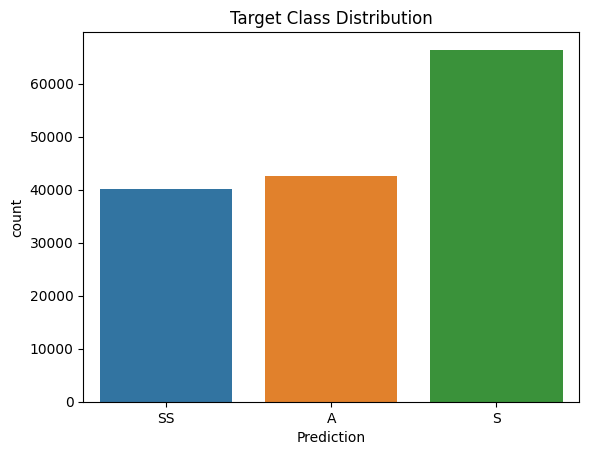

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot value counts of target column
sns.countplot(data=df, x='Prediction')
plt.title("Target Class Distribution")
plt.show()

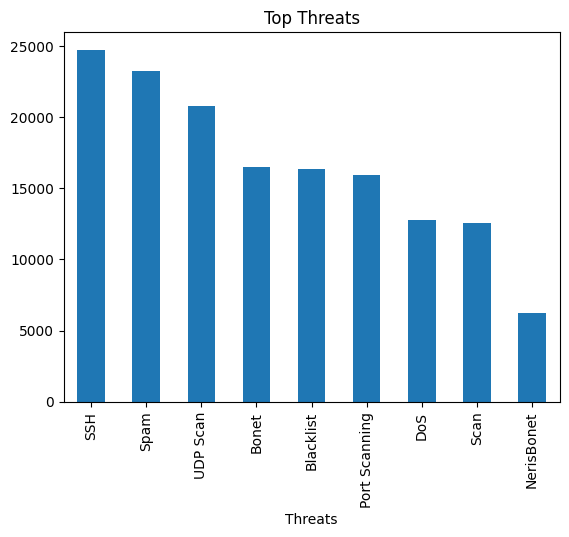

In [8]:
# Plot top 10 frequent 'Threats'
df['Threats'].value_counts().nlargest(10).plot(kind='bar', title='Top Threats')
plt.show()

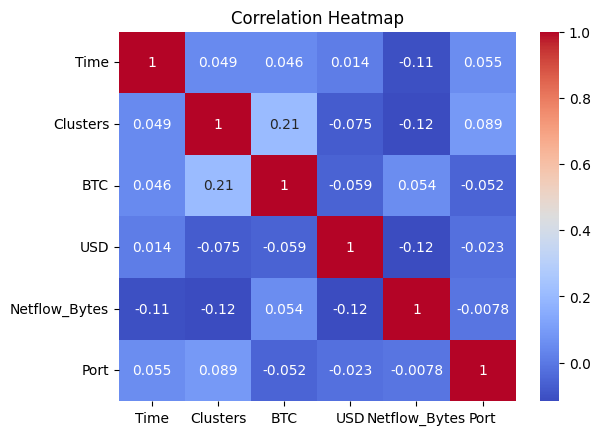

In [9]:
# Correlation heatmap for numerical columns
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

# Drop non-informative columns
df = df.drop(['Time', 'SeddAddress', 'ExpAddress', 'IPaddress'], axis=1)

# Label encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

In [11]:
# Features and target
X = df.drop('Prediction', axis=1)
y = df['Prediction']

In [12]:
from sklearn.model_selection import train_test_split

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Train LightGBM classifier
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 818
[LightGBM] [Info] Number of data points in the train set: 119234, number of used features: 9
[LightGBM] [Info] Start training from score -1.250091
[LightGBM] [Info] Start training from score -0.810664
[LightGBM] [Info] Start training from score -1.313198


LGBMClassifier()

In [14]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReport:\n", classification_report(y_test, y_pred))

Accuracy: 0.9882250327082425

Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      8403
           1       0.99      0.98      0.99     13373
           2       0.99      1.00      0.99      8033

    accuracy                           0.99     29809
   macro avg       0.99      0.99      0.99     29809
weighted avg       0.99      0.99      0.99     29809



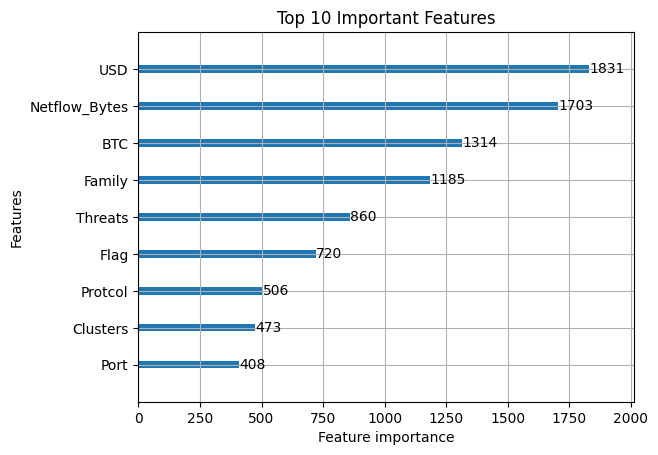

In [15]:
# Plot feature importance
lgb.plot_importance(model, max_num_features=10)
plt.title("Top 10 Important Features")
plt.show()